In [7]:
# https://blog.amedama.jp/entry/hyperopt
from functools import partial

from hyperopt import hp
from hyperopt import fmin
from hyperopt import tpe
from hyperopt import Trials
from hyperopt import STATUS_OK
from hyperopt import space_eval

from sklearn import datasets
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC

def objective(X, y, args):
    clf = SVC(kernel='linear', **args)
    # Stratified 5 Fold Cross Validation
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_validate(clf, X=X, y=y, cv=kf)
    return {
        'loss': -1 * scores['test_score'].mean(),
        'status': STATUS_OK,
        'vals': args,
    }

iris = datasets.load_iris()
X, y = iris.data, iris.target

f = partial(objective, X, y)

space = {
    'C': hp.loguniform('C', 2.303 * 0, 2.303 * +2),
    'gamma': hp.loguniform('gamma', 2.303 * -2, 2.303 * +1),
}

trials = Trials()

best = fmin(fn=f, space=space, algo=tpe.suggest, max_evals=100, trials=trials)
print('best parameters:', space_eval(space, best))

100%|██████████| 100/100 [00:01<00:00, 70.10it/s, best loss: -0.9800000000000001]
best parameters: {'C': 1.0036304715938487, 'gamma': 0.045453508636035055}


Text(0.5, 0, 'C')

Text(0, 0.5, 'gamma')

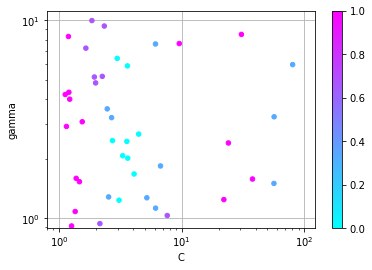

-- accuracy summary --
count    100.000000
mean       0.972533
std        0.007234
min        0.960000
25%        0.966667
50%        0.973333
75%        0.980000
max        0.980000
dtype: float64


In [5]:
# Visualize param searches
xs = [result['vals']['C'] for result in trials.results]
ys = [result['vals']['gamma'] for result in trials.results]
zs = np.array([-1 * result['loss'] for result in trials.results])
s_zs = (zs - zs.min()) / (zs.max() - zs.min()) # 0 ~ 1 の範囲に正規化する

sc = plt.scatter(xs, ys, c=s_zs, s=20, zorder=10, cmap=cm.cool)
plt.colorbar(sc)

plt.xlabel('C')
plt.xscale('log')
plt.ylabel('gamma')
plt.yscale('log')
plt.grid()
plt.show()

print('-- accuracy summary --')
print(pd.Series(np.array(zs).ravel()).describe())